In [1]:
# automatically reload dependant notebooks
%load_ext autoreload
%autoreload 2
import import_ipynb

# Tests of Single-Source Shortest Path Algorithms

This notebook contains tests for the SSP algorithms implemented in the [`ssp.ipynb`](./ssp.ipynb) notebook.

## test Bellman-Ford SSP

Let us test `sspBellmanFord()` against the directed, weighted graph shown in Figure 22.4 p.613. First we construct the graph.

importing Jupyter notebook from graph.ipynb
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
importing Jupyter notebook from util.ipynb
importing Jupyter notebook from mst.ipynb
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
importing Jupyter notebook from ssp.ipynb
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Bellman-Ford
  s: None 
    [t,y]
  t: None 
    [x,y,z]
  x: None 
    [t]
  y: None 
    [x,z]
  z: None 
    [s,x]
  s-t: 6
  s-y: 7
  t-x: 5
  t-y: 8
  t-z: -4
  x-t: -2
  y-x: -3
  y-z: 9
  z-s: 2
  z-x: 7


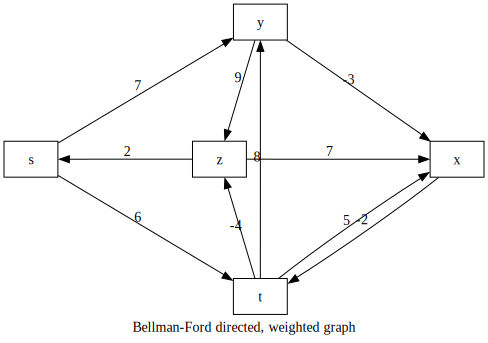

In [2]:
from graph import *
from mst import *
from ssp import *

def makeBFSG() -> SSPGraph:
    vs = ["s", "t", "x", "y", "z"]
    es = {  # directed edges
        "s": ["t", "y"],
        "t": ["x", "y", "z"],
        "x": ["t"],
        "y": ["x", "z"],
        "z": ["s", "x"],
    }
    ew = {
        "s-t": 6,
        "s-y": 7,
        "t-x": 5,
        "t-y": 8,
        "t-z": -4,
        "x-t": -2,
        "y-x": -3,
        "y-z": 9,
        "z-s": 2,
        "z-x": 7,
    }
    g = SSPGraph("Bellman-Ford")
    g.makeVEw(vs, es, ew)
    return g

bfsg = makeBFSG()
print(bfsg)
draw(bfsg, directed=True, label=f"{bfsg.tag} directed, weighted graph")

Then, we apply `sspBellmanFord()` to the graph to extract the SSP. Note that `sspBellmanFord()` returns a `None`, if there is a negative-weight cycle reachable from the source vertex `s`.

Bellman-Ford¶
  s: None 0
    [y]
  t: ^x 2
    [z]
  x: ^y 4
    [t]
  y: ^s 7
    [x]
  z: ^t -2
    []
  x-t: -2
  y-x: -3
  s-y: 7
  t-z: -4


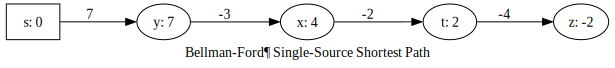

In [3]:
bfsgp = sspBellmanFord(bfsg, bfsg.getV("s"))
assert(isSome(bfsgp))
print(bfsgp)
draw(bfsgp, directed=True, label=f"{bfsgp.tag} Single-Source Shortest Path")

## test Bellman-Ford DAWG

We construct the DAWG shown on p.618 to test the more efficient, DAWG-only version of the Bellman-Ford algorithm.

Bellman-Ford DAWG
  r: None 
    [s,t]
  s: None 
    [t,x]
  t: None 
    [x,y,z]
  x: None 
    [y,z]
  y: None 
    [z]
  z: None 
    []
  r-s: 5
  r-t: 3
  s-t: 2
  s-x: 6
  t-x: 7
  t-y: 4
  t-z: 2
  x-y: -1
  x-z: 1
  y-z: -2


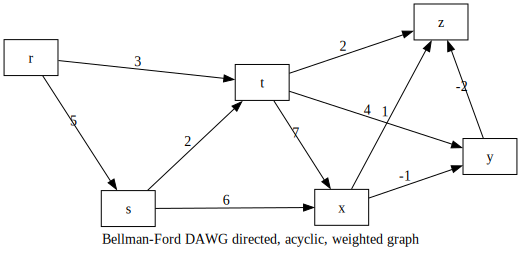

In [4]:
def makeBFSD() -> SSPGraph:
    vs = ["r", "s", "t", "x", "y", "z"]
    es = {  # directed edges
        "r": ["s", "t"],
        "s": ["t", "x"],
        "t": ["x", "y", "z"],
        "x": ["y", "z"],
        "y": ["z"],
        "z": [],
    }
    ew = {
        "r-s": 5,
        "r-t": 3,
        "s-t": 2,
        "s-x": 6,
        "t-x": 7,
        "t-y": 4,
        "t-z": 2,
        "x-y": -1,
        "x-z": 1,
        "y-z": -2,
    }
    g = SSPGraph("Bellman-Ford DAWG")
    g.makeVEw(vs, es, ew)
    return g

bfsd = makeBFSD()
print(bfsd)
draw(bfsd, directed=True, label=f"{bfsd.tag} directed, acyclic, weighted graph")

Next, we apply `sspBellmanFordDAWG()` to the DAWG.

Bellman-Ford DAWG¶
  s: None 0/11
    [t,x]
  r: None /12
    []
  t: ^s 2/10
    []
  x: ^s 6/9
    [y]
  y: ^x 5/8
    [z]
  z: ^y 3/7
    []
  s-t: 2
  s-x: 6
  x-y: -1
  y-z: -2


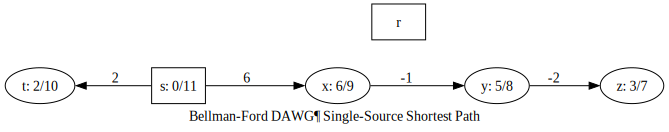

In [5]:
bfsdp = sspBellmanFordDAWG(bfsd, bfsd.getV("s"))
assert(isSome(bfsdp))
print(bfsdp)
draw(bfsdp, directed=True, label=f"{bfsdp.tag} Single-Source Shortest Path")

## test Dijkstra SSP

We shall test `sspDijkstra()` using the directed, weighted graph shown in Figure 22.6 p.621.

Dijkstra
  s: None  
    [t,y]
  t: None  
    [x,y]
  x: None  
    [z]
  y: None  
    [t,x,z]
  z: None  
    [s,x]
  s-t: 10
  s-y: 5
  t-x: 1
  t-y: 2
  x-z: 4
  y-t: 3
  y-x: 9
  y-z: 2
  z-s: 7
  z-x: 6


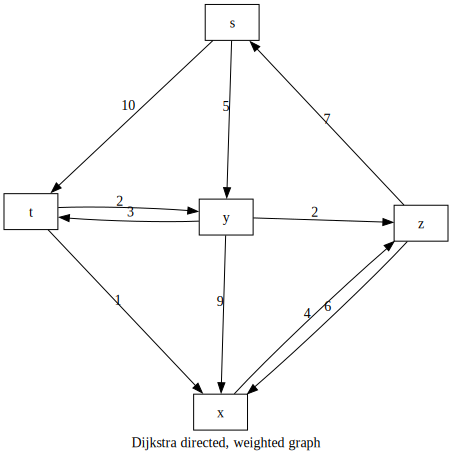

In [6]:
def makeDSG() -> SSPGraph:
    vs = ["s", "t", "x", "y", "z"]
    es = {  # directed edges
        "s": ["t", "y"],
        "t": ["x", "y"],
        "x": ["z"],
        "y": ["t", "x", "z"],
        "z": ["s", "x"],
    }
    ew = {
        "s-t": 10,
        "s-y": 5,
        "t-x": 1,
        "t-y": 2,
        "x-z": 4,
        "y-t": 3,
        "y-x": 9,
        "y-z": 2,
        "z-s": 7,
        "z-x": 6,
    }
    g = DijkstraSSPGraph("Dijkstra")
    g.makeVEw(vs, es, ew)
    return g

dsg = makeDSG()
print(dsg)
draw(dsg, directed=True, label=f"{dsg.tag} directed, weighted graph")

Now, we apply `sspDijkstra()` to this directed, weighted graph.

Dijkstra¶
  s: None 0 0
    [y]
  t: ^y 8 
    [x]
  x: ^t 11 
    []
  y: ^s 5 
    [t,z]
  z: ^y 7 
    []
  y-t: 3
  t-x: 1
  s-y: 5
  y-z: 2


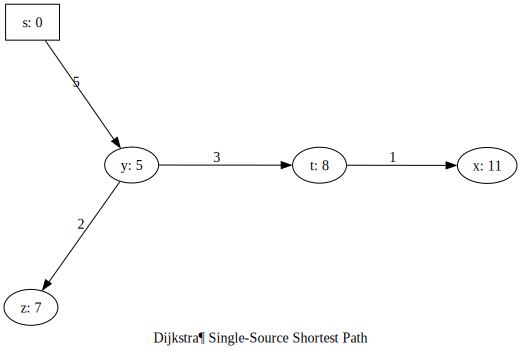

In [7]:
dsgp = sspDijkstra(dsg, dsg.getV("s"))
assert(isSome(dsgp))
print(dsgp)
draw(dsgp, directed=True, label=f"{dsgp.tag} Single-Source Shortest Path")